In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
dataset=pd.read_csv('housePrice.csv')

In [4]:
dataset.head(2)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67


In [5]:
dataset.shape

(3479, 8)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [7]:
dataset.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [8]:
dataset.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


### Since Price and Price USD are Output so remove one Column

In [9]:
dataset.drop('Price' , axis=1 ,inplace=True)

In [10]:
dataset['Address'].fillna(dataset['Address'].mode()[0] , inplace=True)

C:\Users\zesha\AppData\Local\Temp\ipykernel_13260\1196973959.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Address'].fillna(dataset['Address'].mode()[0] , inplace=True)


In [11]:
dataset.head(2)

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD)
0,63,1,True,True,True,Shahran,61666.67
1,60,1,True,True,True,Shahran,61666.67


In [12]:
dataset['Area']=dataset['Area'].str.replace(',' ,'' )
dataset['Area']=dataset['Area'].astype('float64')

## Data Visualization Process

In [13]:
# Find the top 5 most frequent addresses
top_5_locations = dataset['Address'].value_counts().nlargest(5).index

# Filter the dataset to only include these top 5 locations
top_5_df = dataset[dataset['Address'].isin(top_5_locations)]

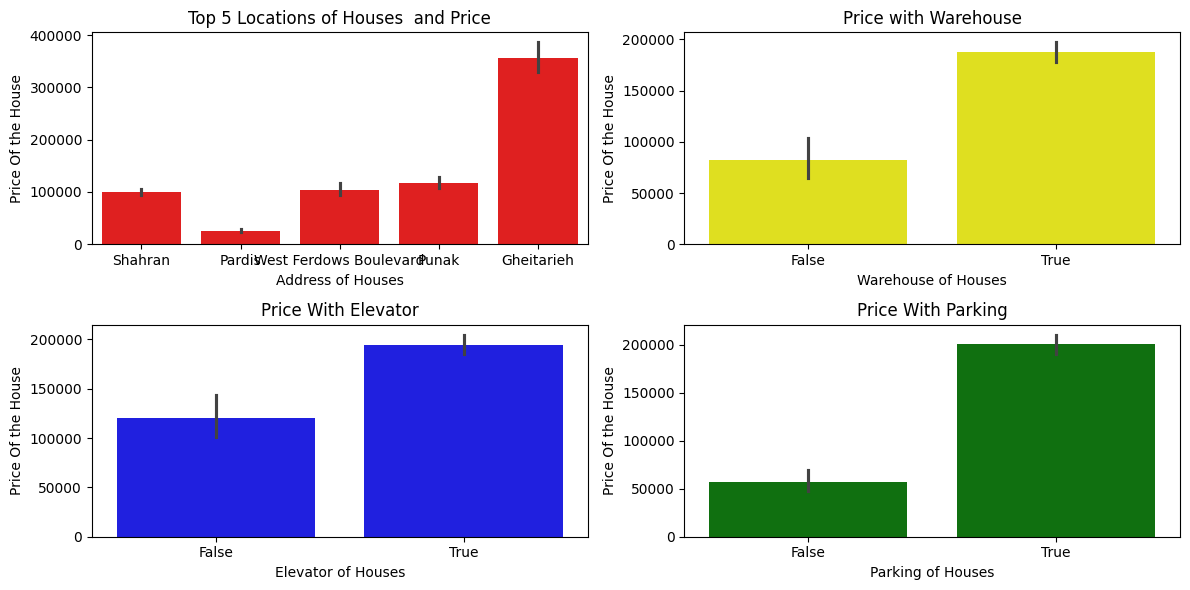

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sb.barplot(data=top_5_df ,x='Address'  , y='Price(USD)' ,color='red')
plt.xlabel("Address of Houses")
plt.ylabel("Price Of the House")
plt.title("Top 5 Locations of Houses  and Price")
plt.tight_layout()
plt.subplot(2,2,2)
sb.barplot(data=dataset ,x="Warehouse"  , y='Price(USD)',color='yellow')
plt.xlabel("Warehouse of Houses")
plt.ylabel("Price Of the House")
plt.title("Price with Warehouse")
plt.tight_layout()

plt.subplot(2,2,3)
sb.barplot(data=dataset ,x="Elevator"  , y='Price(USD)',color='blue')
plt.xlabel("Elevator of Houses")
plt.ylabel("Price Of the House")
plt.title("Price With Elevator")
plt.tight_layout()

plt.subplot(2,2,4)
sb.barplot(data=dataset ,x="Parking"  , y='Price(USD)',color='green')
plt.xlabel("Parking of Houses")
plt.ylabel("Price Of the House")
plt.title("Price With Parking")
plt.tight_layout()

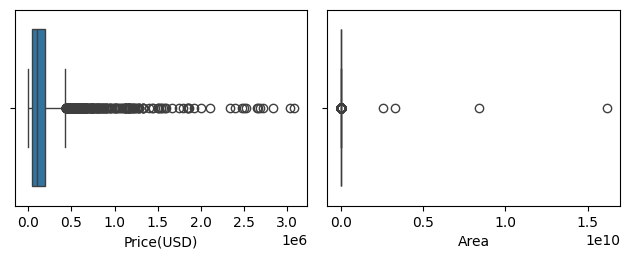

In [15]:
#Removing Outliers from Price(USD) and Area
plt.subplot(2,2,1)
sb.boxplot(x=dataset['Price(USD)'])
plt.tight_layout()
plt.subplot(2,2,2)
sb.boxplot(x=dataset['Area'])
plt.tight_layout()
plt.show()

In [16]:
# --- Step 1: Remove outliers from 'Price(USD)' ---
Q1_price = dataset['Price(USD)'].quantile(0.25)
Q3_price = dataset['Price(USD)'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Create the first clean DataFrame
dataset_clean = dataset[(dataset['Price(USD)'] >= lower_bound_price) & (dataset['Price(USD)'] <= upper_bound_price)]

print(f"Shape after removing Price outliers: {dataset_clean.shape}")
# --- Step 2: Remove outliers from 'Area' using the ALREADY cleaned data ---
Q1_area = dataset_clean['Area'].quantile(0.25)
Q3_area = dataset_clean['Area'].quantile(0.75)
IQR_area = Q3_area - Q1_area
lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

# IMPORTANT: Filter the 'dataset_clean' DataFrame, not the original 'dataset'
dataset_clean = dataset_clean[(dataset_clean['Area'] >= lower_bound_area) & (dataset_clean['Area'] <= upper_bound_area)]
print(f"Shape after removing Area outliers: {dataset_clean.shape}")

Shape after removing Price outliers: (3169, 7)
Shape after removing Area outliers: (3080, 7)


In [17]:
print(f"Original data shape: {dataset.shape}")
print(f"Data shape after removing outliers: {dataset_clean.shape}")

Original data shape: (3479, 7)
Data shape after removing outliers: (3080, 7)


# Model Creations

In [18]:
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression ,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,AdaBoostRegressor ,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error ,mean_squared_error ,r2_score 
from sklearn.ensemble import StackingRegressor

In [19]:
dataset_encoded = pd.get_dummies(dataset_clean, columns=['Address'], drop_first=True)

In [20]:
input_data=dataset_encoded.drop('Price(USD)' , axis=1)
output=dataset_encoded['Price(USD)']

In [21]:
y_log = np.log1p(output)

In [22]:
X_train ,X_test ,y_train ,y_test=train_test_split(input_data ,y_log , test_size=.2 ,random_state=42)

In [23]:
y_train_log = np.log1p(y_train)

In [24]:
my_base_models = [
    ('gbr', GradientBoostingRegressor(random_state=42,learning_rate= 0.2,n_estimators=300)),
    ('xgb', XGBRegressor(random_state=42))
]

In [25]:
stacking_model = StackingRegressor(
    estimators=my_base_models,  # <-- Pass the list here
    final_estimator=RidgeCV()
)

In [26]:
pipeline = Pipeline([
    ('st', StandardScaler()),
    ('stack', stacking_model)  # Use the single stacking_model object here
])

In [27]:
pipeline.fit(X_train,y_train_log)

,steps,"[('st', ...), ('stack', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,estimators,"[('gbr', ...), ('xgb', ...)]"
,final_estimator,RidgeCV()
,cv,None
,n_jobs,None


In [28]:
pipeline.score(X_test,y_test)*100

-9064.498840017497

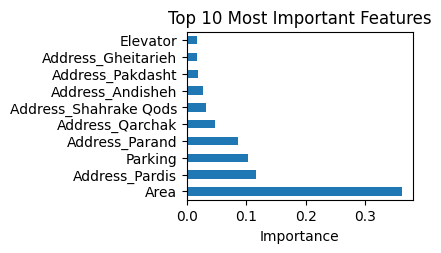

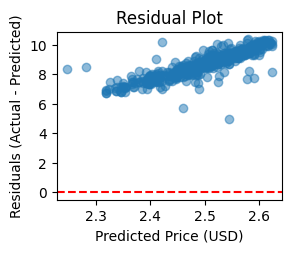

In [29]:
gbr_model = pipeline.named_steps['stack'].named_estimators_['gbr']

feature_names = X_train.columns
importances = pd.Series(gbr_model.feature_importances_, index=feature_names)

# Sort and plot the top 10 features
# Create a scatter plot
plt.subplot(2,2,1)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.show()

# Get predictions on the test set
predictions = pipeline.predict(X_test)
residuals = y_test - predictions

# Create a scatter plot
plt.subplot(2,2,2)
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at zero
plt.title('Residual Plot')
plt.xlabel('Predicted Price (USD)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

In [30]:
param_grid = {
    'stack__gbr__n_estimators': [200, 300],
    'stack__gbr__learning_rate': [0.1, 0.2],
    # You can also add parameters for your other models
    'stack__xgb__n_estimators': [200, 300]
}

In [31]:
grid_search = GridSearchCV(
    estimator=pipeline, # Your correctly built pipeline
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=1,  # <-- Change this from -1 to 1
    verbose=2
)

In [32]:
try:
    grid_search.fit(X_train, y_train)
    print("✅ SUCCESS: The pipeline structure is correct and it was fitted successfully!")
except Exception as e:
    print(f"❌ ERROR: The pipeline failed to fit. Error message: {e}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END stack__gbr__learning_rate=0.1, stack__gbr__n_estimators=200, stack__xgb__n_estimators=200; total time=   6.7s
[CV] END stack__gbr__learning_rate=0.1, stack__gbr__n_estimators=200, stack__xgb__n_estimators=200; total time=   6.3s
[CV] END stack__gbr__learning_rate=0.1, stack__gbr__n_estimators=200, stack__xgb__n_estimators=200; total time=   5.7s
[CV] END stack__gbr__learning_rate=0.1, stack__gbr__n_estimators=200, stack__xgb__n_estimators=300; total time=   7.1s
[CV] END stack__gbr__learning_rate=0.1, stack__gbr__n_estimators=200, stack__xgb__n_estimators=300; total time=   9.1s
[CV] END stack__gbr__learning_rate=0.1, stack__gbr__n_estimators=200, stack__xgb__n_estimators=300; total time=   7.9s
[CV] END stack__gbr__learning_rate=0.1, stack__gbr__n_estimators=300, stack__xgb__n_estimators=200; total time=  10.0s
[CV] END stack__gbr__learning_rate=0.1, stack__gbr__n_estimators=300, stack__xgb__n_estimators=200; total t

In [33]:
grid_search.score(X_test,y_test)*100

82.06878025479064

In [34]:
print("\nGrid Search Finished.")

# Print the best parameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_gbr_model = grid_search.best_estimator_



Grid Search Finished.
Best Hyperparameters: {'stack__gbr__learning_rate': 0.2, 'stack__gbr__n_estimators': 300, 'stack__xgb__n_estimators': 300}


In [35]:
y_pred = grid_search.predict(X_test)

In [36]:
final_predictions = np.expm1(y_pred)

In [37]:
mae = mean_absolute_error(y_test, final_predictions)
mse = mean_squared_error(y_test, final_predictions)
r2 = r2_score(y_test, final_predictions)
rmse = np.sqrt(mse) # Can reuse the mse variable here
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

print("RMSE:", rmse)


Mean Absolute Error: 100022.17365966325
Mean Squared Error: 16029073853.53858
R2 Score: -19227129451.442295
RMSE: 126605.97874325913


In [38]:
import joblib

# 'X_train' is your training data DataFrame
# This saves the column order to a file
joblib.dump(X_train.columns, 'model_columns.pkl')

# Also, get the list of unique addresses from your original LabelEncoder
# We will need this for the dropdown menu in the app
# Replace 'Le' with the name of your LabelEncoder variable
address_list = Le.classes_
joblib.dump(address_list, 'address_list.pkl')


print("Model columns and address list saved successfully!")

NameError: name 'Le' is not defined

In [ ]:
import sys
import os
scripts_path = os.path.join(os.path.dirname(sys.executable), 'Scripts')
print(scripts_path)

C:\Users\zesha\AppData\Local\Programs\Python\Python313\Scripts


In [43]:
import joblib
import numpy as np

# --- Make sure these variables are correct ---
# 'grid_search_stack' should be your final, fitted GridSearchCV object
# 'X_train' is your training data
# 'Le' is the LabelEncoder you used on the original 'Address' column

# 1. Save the final, best model from your grid search
final_model = grid_search.best_estimator_
joblib.dump(final_model, 'final_house_price_model.pkl')

# 2. Save the column order from your training data
joblib.dump(X_train.columns, 'model_columns.pkl')
address_list = dataset['Address'].unique()

# Sort the list alphabetically for a clean dropdown in the app
address_list.sort()

# Save the list to the file
joblib.dump(address_list, 'address_list.pkl')

# 3. Save the list of unique addresses


print("✅ Success! 'final_house_price_model.pkl', 'model_columns.pkl', and 'address_list.pkl' have been created.")

✅ Success! 'final_house_price_model.pkl', 'model_columns.pkl', and 'address_list.pkl' have been created.
